In [2]:
import os,sys,string, time
from math import *
from array import array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from root_pandas import read_root
from platform import python_version
import scipy
from scipy import stats
import math
from matplotlib.patches import Rectangle
import joblib
from datetime import date

import Utilities.Plotter as PT
import Utilities.Constants as Constants
import Utilities.Functions as Functions
import Utilities.Variables_list as Var_list
from Utilities.ipython_exit import exit

print ('Success')


Welcome to JupyROOT 6.24/06
Success


## Reading limit .csvs

In [8]:
samples = ["PIENU","PS191","KEK","E949"]
print("Plotting these limits: " + str(samples))
plot_dict = {}
for sample in samples:
    plot_dict[sample] = Functions.Pandafy(Constants.limit_locs[sample])
    
uboone_ee_obs = Functions.Pandafy('limit_files/Brazil_plot/obs_limit_ee_21_April.csv')
uboone_pi0_obs = Functions.Pandafy('limit_files/Brazil_plot/obs_limit_pi0_21_April.csv')

# uboone_ee_current = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_mu_FINAL.csv')
uboone_ee_current = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_20_April.csv')

uboone_ee_run1 = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_mu_FINAL_run1.csv')
uboone_ee_run3 = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_mu_FINAL_run3.csv')

uboone_ee_reduced = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_mu_benchmark_r3_flashmatch_scaled.csv')

uboone_sys_split = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_mu_benchmark_r3_flashmatch_split_test.csv')

# uboone_pi0_approx = Functions.Pandafy('limit_files/My_limits/Flat_sys_havled_expected_pi0_mu_all_vars_logit_New.csv')
uboone_pi0_approx = Functions.Pandafy('limit_files/My_limits/Flat_sys_4_bins_pi0_reduced_vars_test_2.csv')
uboone_pi0_reduced = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_pi0_expected_20_April.csv')

Ten_event_limit = Functions.Pandafy('limit_files/My_limits/10_event_expected_mu_run3.csv')

uboone_ee_old = Functions.Pandafy('limit_files/My_limits/Pre_scaled_limit.csv')

uboone_mupi = Functions.Pandafy('limit_files/uboone_mupi.csv')

T2K_observed = Functions.Pandafy('limit_files/T2K_Umu4_observed_2019.csv')

NA62_observed = Functions.Pandafy('limit_files/NA62_limit.csv')

SIN_1987 = Functions.Pandafy('limit_files/SIN_BR_ratio.csv')

Theorist_Pawels = Functions.Pandafy('limit_files/Reinterp_Pawels_result.csv')

T2K_recast = Functions.Pandafy('limit_files/T2K_recast_full_data.csv')

BBN = Functions.Pandafy('limit_files/BBN_Nicolo_paper.csv')

point = [150,4.26974152748967e-07]

Plotting these limits: ['PIENU', 'PS191', 'KEK', 'E949']


FileNotFoundError: [Errno 2] No such file or directory: 'limit_files/My_limits/Flat_sys_4_bins_pi0_reduced_vars_test_2.csv'

## Plotting limits < 250MeV

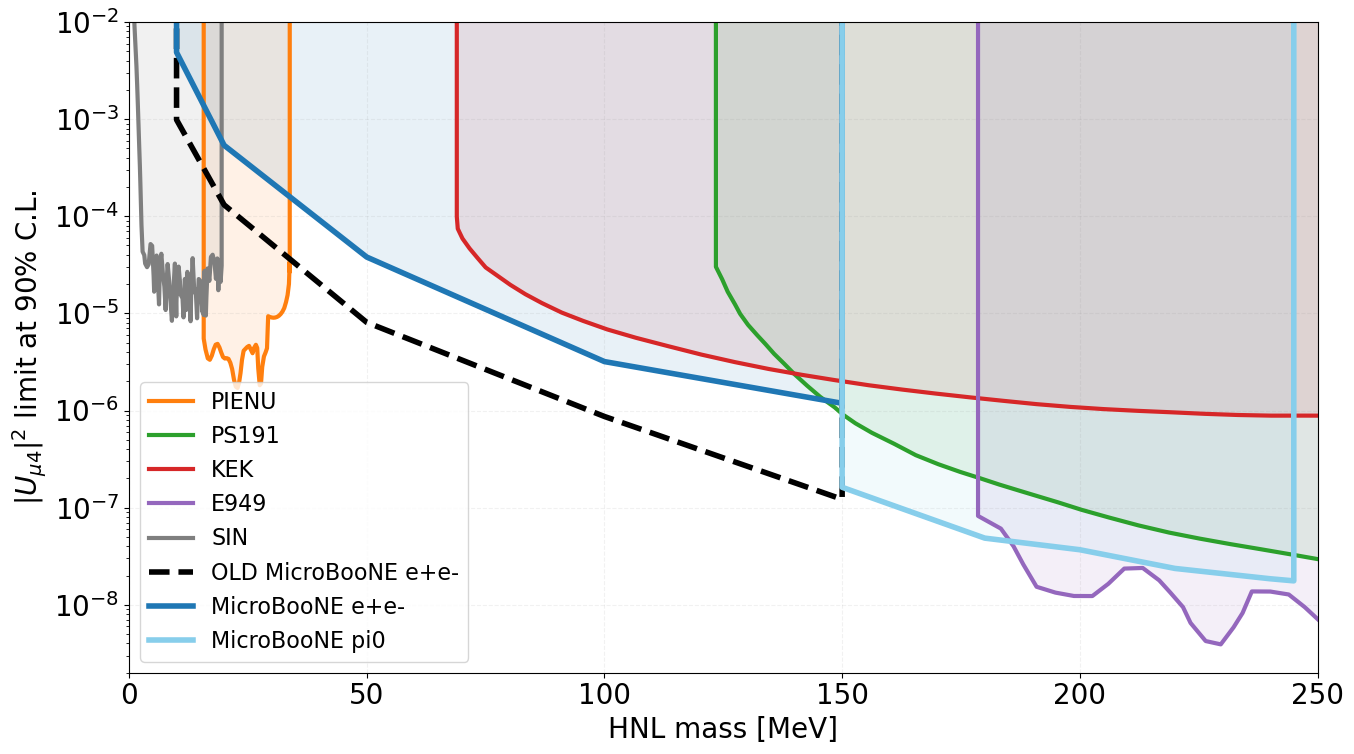

In [7]:
style_ps = '-'
style_ds = '-'
transp = 0.05

savefig = True

plt.figure(figsize=(14,8),facecolor='white',dpi=100)

#Could loop over a dict (saved in constants) of other relevant limits
for sample in samples:
    plt.plot(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],label=sample, color=Constants.limit_colours[sample], lw=3)
    plt.fill_between(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],1,color=Constants.limit_colours[sample],alpha=0.1)


plt.plot(SIN_1987['Mass'],SIN_1987['Value'],label=r"SIN",color="C17",lw=3)
plt.fill_between(SIN_1987['Mass'],SIN_1987['Value'],1,color="C17",alpha=0.1)

plt.plot(uboone_ee_old['Mass'],uboone_ee_old['Value'],label="OLD MicroBooNE e+e-",color="black",lw=4, linestyle="dashed")
# plt.fill_between(uboone_ee_old['Mass'],uboone_ee_old['Value'],1,color="black",alpha=0.1)
plt.plot(uboone_pi0_approx['Mass'],uboone_pi0_approx['Value'],label="OLD MicroBooNE pi0",color="grey",lw=4, linestyle="dashed")

plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],label="MicroBooNE e+e-",color="C10",lw=4)
plt.fill_between(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],1,color="C10",alpha=0.1)

plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],label="MicroBooNE pi0",color="skyblue",lw=4)
plt.fill_between(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],1,color="skyblue",alpha=0.1)

    
lower_lim_BBN = np.full(101, 1e-8)

plt.xlabel('HNL mass [MeV]',fontsize=20)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=20)
plt.legend()
# plt.ylim(1e-8,1e-3)
plt.ylim(2e-9,1e-2)
#plt.xlim(0,0.45)
plt.xlim(0.00,250)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 16}, loc="lower left")
plt.tight_layout()

today = date.today()
d1 = today.strftime("%d_%m")

if savefig == True:
    name = f"limit_{d1}_with_old"
    plt.savefig('plots/Limits/'+name+'.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/'+name+'.png',bbox_inches='tight', pad_inches=0.3)
plt.show()


## Plotting FULL MicroBooNE limit

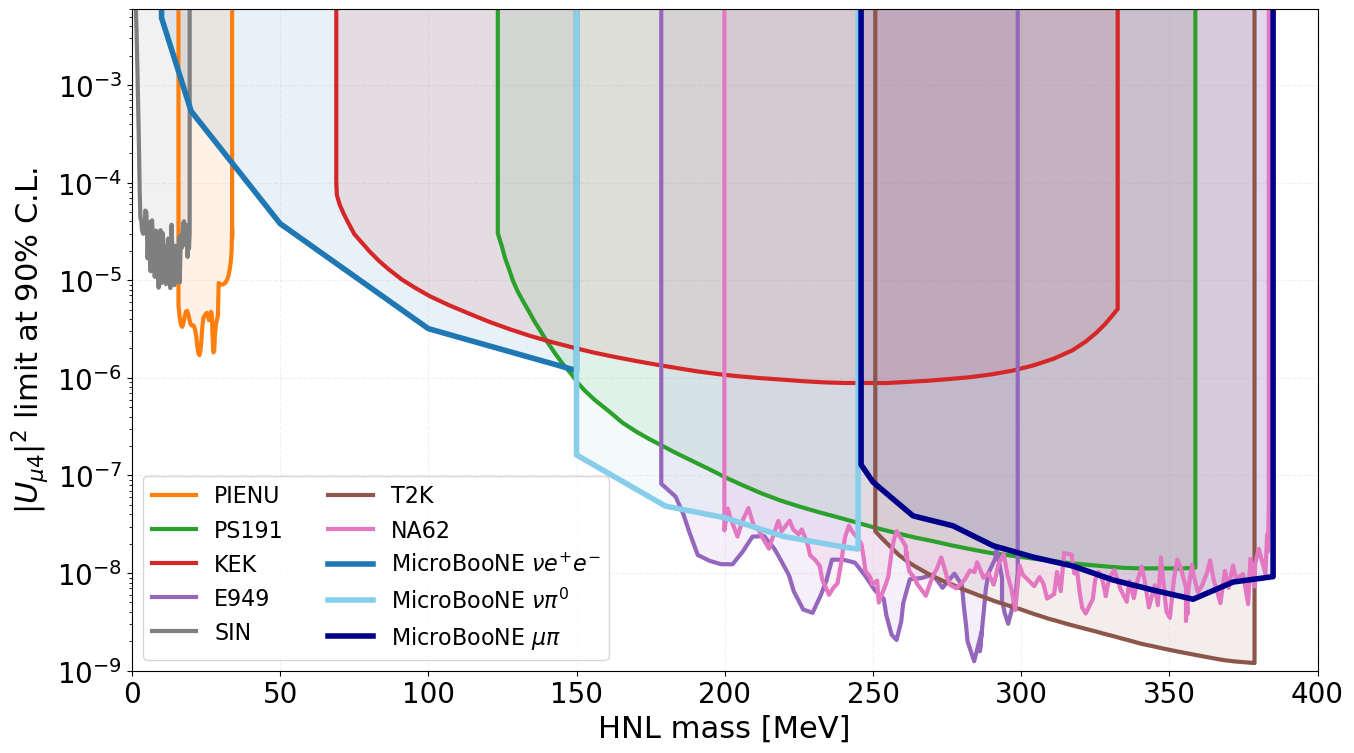

In [33]:
plt.figure(figsize=(14,8),facecolor='white',dpi=100)

savefig=True

for sample in samples:
    plt.plot(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],label=sample, color=Constants.limit_colours[sample], lw=3)
    plt.fill_between(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],1,color=Constants.limit_colours[sample],alpha=0.1)
    
plt.plot(SIN_1987['Mass'],SIN_1987['Value'],label=r"SIN",color="C17",lw=3)
plt.fill_between(SIN_1987['Mass'],SIN_1987['Value'],1,color="C17",alpha=0.1)
    
plt.plot(T2K_observed['Mass'],T2K_observed['Value'],label=r"T2K",color="C15",lw=3)
plt.fill_between(T2K_observed['Mass'],T2K_observed['Value'],1,color="C15",alpha=0.1)

plt.plot(NA62_observed['Mass'],NA62_observed['Value'],label=r"NA62",color="C16",lw=3)
plt.fill_between(NA62_observed['Mass'],NA62_observed['Value'],1,color="C16",alpha=0.1)
    
plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],label=r"MicroBooNE $\nu e^{+}e^{-}$",color="C10",lw=4)
plt.fill_between(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],1,color="C10",alpha=0.1)

plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],label=r"MicroBooNE $\nu\pi^{0}$",color="skyblue",lw=4)
plt.fill_between(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],1,color="skyblue",alpha=0.1)

plt.plot(uboone_mupi['Mass'],uboone_mupi['Value'],label=r"MicroBooNE $\mu\pi$",color="darkblue",lw=4)
plt.fill_between(uboone_mupi['Mass'],uboone_mupi['Value'],1,color="darkblue",alpha=0.1)

plt.xlabel('HNL mass [MeV]',fontsize=22)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=22)
# plt.ylim(1e-8,1e-3)
plt.ylim(1e-9,6e-3)
#plt.xlim(0,0.45)
plt.xlim(0.00,400)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 16}, loc="lower left",ncol=2)
plt.tight_layout()


if savefig == True:
    name = f"limit_{d1}"
    plt.savefig('plots/Limits/ALL_comparison.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/ALL_comparison.png',bbox_inches='tight', pad_inches=0.3)
plt.show()

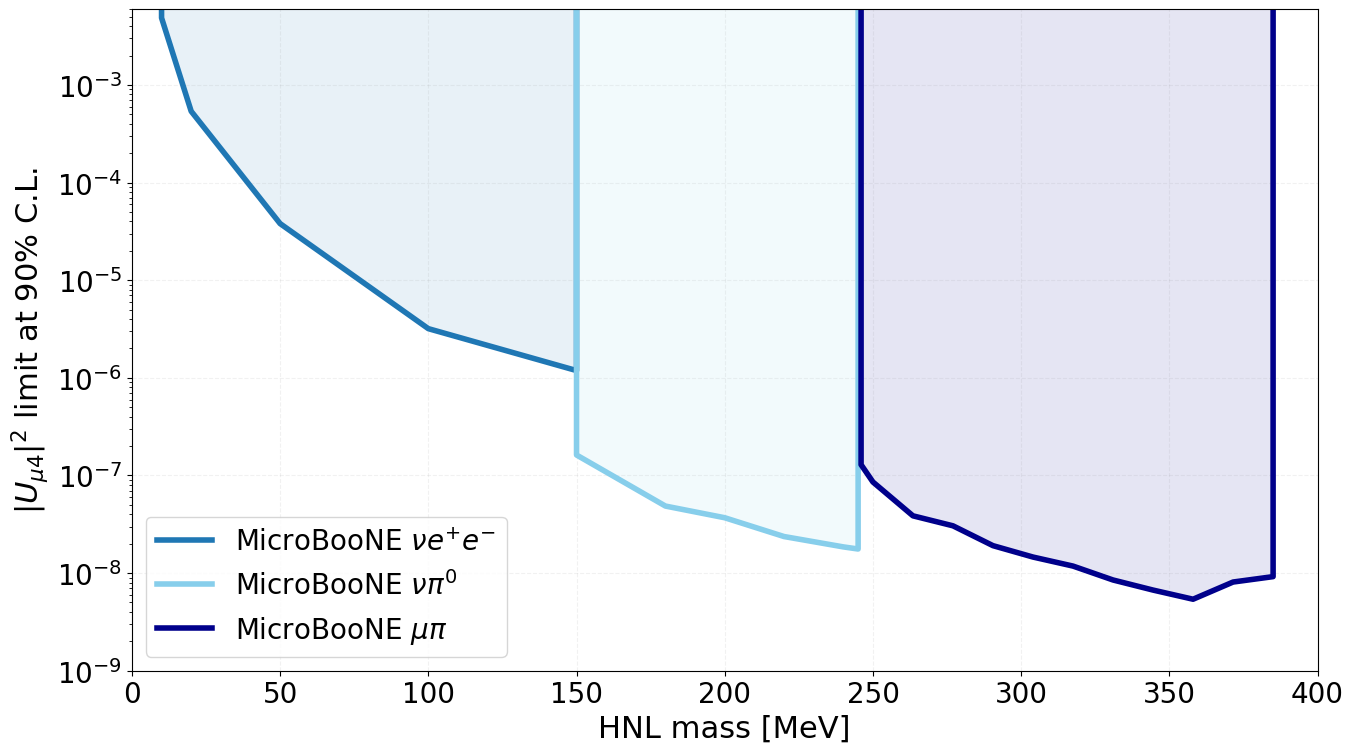

In [37]:
plt.figure(figsize=(14,8),facecolor='white',dpi=100)

savefig=True

plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],label=r"MicroBooNE $\nu e^{+}e^{-}$",color="C10",lw=4)
plt.fill_between(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],1,color="C10",alpha=0.1)

plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],label=r"MicroBooNE $\nu\pi^{0}$",color="skyblue",lw=4)
plt.fill_between(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],1,color="skyblue",alpha=0.1)

plt.plot(uboone_mupi['Mass'],uboone_mupi['Value'],label=r"MicroBooNE $\mu\pi$",color="darkblue",lw=4)
plt.fill_between(uboone_mupi['Mass'],uboone_mupi['Value'],1,color="darkblue",alpha=0.1)

plt.xlabel('HNL mass [MeV]',fontsize=22)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=22)
# plt.ylim(1e-8,1e-3)
plt.ylim(1e-9,6e-3)
#plt.xlim(0,0.45)
plt.xlim(0.00,400)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 20}, loc="lower left",ncol=1)
plt.tight_layout()

if savefig == True:
    name = f"limit_{d1}"
    plt.savefig('plots/Limits/Just_uboone.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/Just_uboone.png',bbox_inches='tight', pad_inches=0.3)
plt.show()


## Calculating ratios of limits

In [ ]:
# plt.figure(figsize=(14,8),facecolor='white',dpi=100)

arr_50_percent = np.array(uboone_ee_current)
arr_150_percent = np.array(uboone_ee_150percent)

ratio = np.divide(arr_50_percent, arr_150_percent)
print(ratio)


In [ ]:
print(BBN['Value'])
print(type(BBN))
lower_lim = np.full(101, 1e-8)